In [1]:
#This program written for PCA Face Feature Extraction as part of Eckovation guided project #1
#The face recognition system consists of a feature extraction step and a classification step.
#Principal component analysis (PCA) is widely used in such scenarios to construct the feature space and 
#extract features, substantially reducing the dimensionality of the input feature vector/image. 
#The reduced feature vector can then be used for the purpose of face analysis.
#Question:
#Using PCA create a face recognition system that gives access to only certain people. 
#To implement this, you can use LFW_peoples dataset provided in the scikit-learn library.
#Given this dataset, use only those classes that have a minimum (use min_faces_per_person = 70, resize = 0.4 )
#70 images (should give you only 11 classes). 
#Given this subset of images, apply PA to obtain the corresponding eigen face for each class.
#You can additionally train a classifier for recognition purpose.

In [2]:
#Import sklearn daatasets, model selection, neural network, numpy, matplotlib
from sklearn.datasets import fetch_lfw_people
from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report
from sklearn.decomposition import PCA
from sklearn.neural_network import MLPClassifier
import numpy as np
import matplotlib.pyplot as plt

In [3]:
# Preparing Dataset
dataset = fetch_lfw_people(min_faces_per_person=70, resize=0.4)
#min_faces_per_person modified to get accuracy level. As we increase faces, the accuracy, f1-score will improve and vice versa.
X = dataset.data
y = dataset.target
target_names = dataset.target_names
images = dataset.images

In [4]:
X.shape

(1288, 1850)

In [5]:
n, h, w = images.shape
print(len(target_names))
np.unique(y, return_counts = True)

7


(array([0, 1, 2, 3, 4, 5, 6], dtype=int64),
 array([ 77, 236, 121, 530, 109,  71, 144], dtype=int64))

In [6]:
print(n)
print(h)
print(w)

1288
50
37


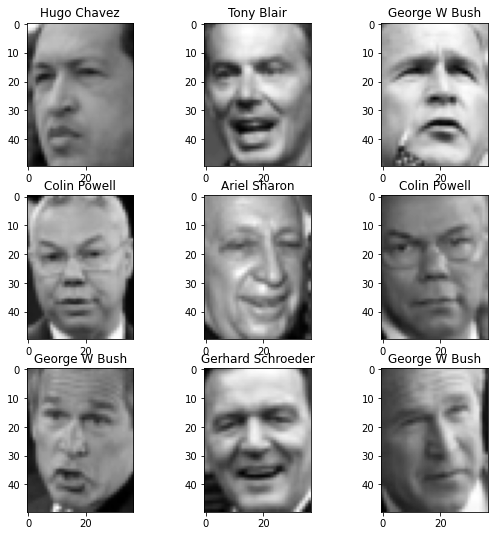

In [7]:
# Plot the images
def plot_img(images, titles, h, w, rows=3, cols=3):
    plt.figure(figsize=(3*cols, 3*rows))
    for i in range(rows*cols):
        plt.subplot(rows, cols, i+1)
        plt.imshow(images[i].reshape(h,w), cmap="gray")
        plt.title(target_names[titles[i]])
plot_img(X, y, h, w)

In [8]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.1)

In [9]:
X_train.shape

(1159, 1850)

In [10]:
# Fit training dataset
pca = PCA()
pca.fit(X_train)

PCA()

In [11]:
pca.transform(X_train).shape

(1159, 1159)

In [12]:
var = pca.explained_variance_
print(var)
comp = pca.components_
print(comp.shape)

[4.8430506e+05 3.8642622e+05 1.8912964e+05 ... 4.3475381e-01 3.7618086e-01
 3.0727726e-06]
(1159, 1850)


In [13]:
val_sum = np.sum(var)
print(val_sum)
sort_indx = np.argsort(var)
sort_indx = sort_indx[::-1]
print(sort_indx)

2580111.0
[   0    1    2 ... 1156 1157 1158]


In [14]:
temp_sum = 0
principal_vec = []
principal_val = []
i = 0
while (temp_sum < 0.98*val_sum):
    principal_vec.append(comp[sort_indx[i], :])
    principal_val.append(var[sort_indx[i]])
    temp_sum += var[sort_indx[i]]
    i += 1
print("Number of components : {}".format(i))

Number of components : 252


In [15]:
principal_vec = np.matrix(principal_vec)
print(principal_vec.shape)

(252, 1850)


In [16]:
X_train_transf = np.dot(X_train, principal_vec.T)
X_test_transf = np.dot(X_test, principal_vec.T)

In [17]:
X_train_transf.shape

(1159, 252)

In [18]:
clf = MLPClassifier(hidden_layer_sizes = (1024, ), batch_size = 128, verbose = True, early_stopping = True)
clf.fit(X_train_transf, y_train)

Iteration 1, loss = 25.22964623
Validation score: 0.448276
Iteration 2, loss = 16.34005486
Validation score: 0.551724
Iteration 3, loss = 8.45492085
Validation score: 0.681034
Iteration 4, loss = 5.17489603
Validation score: 0.741379
Iteration 5, loss = 2.45118587
Validation score: 0.784483
Iteration 6, loss = 1.69492719
Validation score: 0.784483
Iteration 7, loss = 1.08909048
Validation score: 0.801724
Iteration 8, loss = 0.66875176
Validation score: 0.775862
Iteration 9, loss = 0.26152378
Validation score: 0.758621
Iteration 10, loss = 0.18143331
Validation score: 0.767241
Iteration 11, loss = 0.04373740
Validation score: 0.827586
Iteration 12, loss = 0.11298442
Validation score: 0.758621
Iteration 13, loss = 0.02597211
Validation score: 0.827586
Iteration 14, loss = 0.02987293
Validation score: 0.827586
Iteration 15, loss = 0.00684005
Validation score: 0.775862
Iteration 16, loss = 0.18316257
Validation score: 0.818966
Iteration 17, loss = 0.09079709
Validation score: 0.827586
Iter

MLPClassifier(batch_size=128, early_stopping=True, hidden_layer_sizes=(1024,),
              verbose=True)

In [19]:
# Estimate Precision, recall, F1-score
y_pred = clf.predict(X_test_transf)
print(classification_report(y_test, y_pred, target_names = target_names))
#min_faces_per_person modified to get accuracy level. As we increase faces, the accuracy, f1-score will improve and vice versa.

                   precision    recall  f1-score   support

     Ariel Sharon       0.71      0.56      0.63         9
     Colin Powell       0.75      0.78      0.77        23
  Donald Rumsfeld       0.76      0.81      0.79        16
    George W Bush       0.80      0.86      0.83        50
Gerhard Schroeder       0.88      0.70      0.78        10
      Hugo Chavez       0.75      0.60      0.67         5
       Tony Blair       0.73      0.69      0.71        16

         accuracy                           0.78       129
        macro avg       0.77      0.71      0.74       129
     weighted avg       0.77      0.78      0.77       129



In [22]:
# Plot the images after applying pca
def plot_img(images, titles, h, w, rows=3, cols=3):
    plt.figure(figsize=(4*cols, 4*rows))
    for i in range(rows*cols):
        plt.subplot(rows, cols, i+1)
        plt.imshow(images[i].reshape(h,w), cmap="gray")
        plt.title([titles[i]])
n_components = 252
mean_imgs = []
for i in range(n_components):
    vec = principal_vec[i,:]
    img = vec.reshape((h, w))
    mean_imgs.append(img)
mean_imgs = np.array(mean_imgs)
print(mean_imgs.shape)

(252, 50, 37)


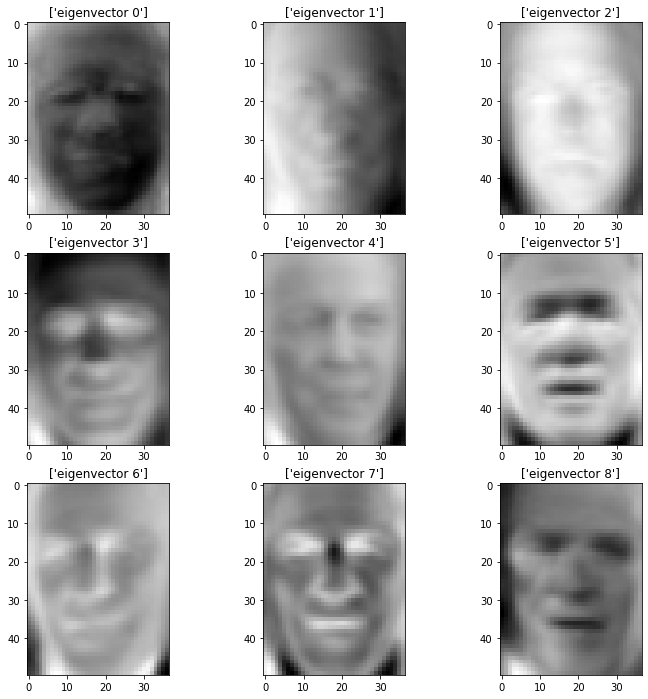

In [23]:
#Estimate Eigen Vector with no of components
pca_titles = [f"eigenvector {i}" for i in range(n_components)]
plot_img(mean_imgs, pca_titles, h, w)